In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

%matplotlib inline

# Import ETF

In [2]:
df_ETF = pd.read_excel(r'C:\Users\Aleksejus\VCS\Savarankiškas\Euro_Stoxx.xlsx', sheet_name='ETF_original')
df_ETF.head(3)

,Date,Open,High,Low,Close,Volume
0,2019-07-24 12:40:00,35.915,35.915,35.915,35.915,500
1,2019-07-24 12:30:00,35.895,35.895,35.895,35.895,635
2,2019-07-24 12:20:00,35.875,35.875,35.875,35.875,20


In [3]:
df_ETF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41417 entries, 0 to 41416
Data columns (total 6 columns):
Date      41417 non-null datetime64[ns]
Open      41417 non-null float64
High      41417 non-null float64
Low       41417 non-null float64
Close     41417 non-null float64
Volume    41417 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 1.9 MB


In [4]:
df_ETF['ETF_Change_in_10_min'] = (df_ETF['Close'] - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['ETF_Change_in_20_min'] = (df_ETF['Close'].shift(1) - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['ETF_Change_in_30_min'] = (df_ETF['Close'].shift(2) - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['ETF_Change_in_40_min'] = (df_ETF['Close'].shift(3) - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['ETF_Change_in_50_min'] = (df_ETF['Close'].shift(4) - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['ETF_Change_in_60_min'] = (df_ETF['Close'].shift(5) - df_ETF['Open']) / df_ETF['Open']*100
df_ETF['High_minus_Low'] = df_ETF['High'] - df_ETF['Low']
df_ETF.head()

,Date,Open,High,Low,Close,Volume,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,High_minus_Low
0,2019-07-24 12:40:00,35.915,35.915,35.915,35.915,500,0.000000,NaN,NaN,NaN,NaN,NaN,0.00
1,2019-07-24 12:30:00,35.895,35.895,35.895,35.895,635,0.000000,0.055718,NaN,NaN,NaN,NaN,0.00
2,2019-07-24 12:20:00,35.875,35.875,35.875,35.875,20,0.000000,0.055749,0.111498,NaN,NaN,NaN,0.00
3,2019-07-24 12:00:00,35.865,35.865,35.835,35.835,6252,-0.083647,0.027882,0.083647,0.139412,NaN,NaN,0.03
4,2019-07-24 11:50:00,35.865,35.875,35.865,35.875,5927,0.027882,-0.083647,0.027882,0.083647,0.139412,NaN,0.01


In [5]:
# df_ETF.to_excel("test3.xlsx", sheet_name = 'Test1')

In [6]:
df_ETF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41417 entries, 0 to 41416
Data columns (total 13 columns):
Date                    41417 non-null datetime64[ns]
Open                    41417 non-null float64
High                    41417 non-null float64
Low                     41417 non-null float64
Close                   41417 non-null float64
Volume                  41417 non-null int64
ETF_Change_in_10_min    41417 non-null float64
ETF_Change_in_20_min    41416 non-null float64
ETF_Change_in_30_min    41415 non-null float64
ETF_Change_in_40_min    41414 non-null float64
ETF_Change_in_50_min    41413 non-null float64
ETF_Change_in_60_min    41412 non-null float64
High_minus_Low          41417 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(1)
memory usage: 4.1 MB


How to change column name

In [7]:
# df_ETF = df_ETF.rename(columns = {'Date':'Date_time'})
# df_ETF.head(5)

# Import unemployment rate

In [8]:
df_Unem = pd.read_excel(r'C:\Users\Aleksejus\VCS\Savarankiškas\Euro_Stoxx.xlsx', sheet_name='Unem_original')
df_Unem.head(5)

,Date,Time,Period,Srv Med,Srv Avg,Srv High,Srv Low,Srv Num,Actual,Prior,Revised,Serv. S.dev.
0,1999-03-04,11:10:00,Jan,- -,- -,0,- -,0,0.106,0.108,- -,NaN
1,1999-04-09,12:00:00,Feb,- -,- -,0,- -,0,0.105,0.106,0.101,NaN
2,1999-05-06,12:00:00,Mar,- -,- -,0,- -,0,0.104,0.105,0.1,NaN
3,1999-06-07,12:00:00,Apr,- -,- -,0,- -,0,0.104,0.104,0.099,NaN
4,1999-07-06,12:00:00,May,- -,- -,0,- -,0,0.103,0.104,0.099,NaN


In [9]:
# df_Unem

Creating new Date & Time Column

In [10]:
df_Unem['Date_time'] = pd.to_datetime(df_Unem['Date'].apply(str)+' '+df_Unem['Time'].apply(str))
df_Unem.head(5)

,Date,Time,Period,Srv Med,Srv Avg,Srv High,Srv Low,Srv Num,Actual,Prior,Revised,Serv. S.dev.,Date_time
0,1999-03-04,11:10:00,Jan,- -,- -,0,- -,0,0.106,0.108,- -,NaN,1999-03-04 11:10:00
1,1999-04-09,12:00:00,Feb,- -,- -,0,- -,0,0.105,0.106,0.101,NaN,1999-04-09 12:00:00
2,1999-05-06,12:00:00,Mar,- -,- -,0,- -,0,0.104,0.105,0.1,NaN,1999-05-06 12:00:00
3,1999-06-07,12:00:00,Apr,- -,- -,0,- -,0,0.104,0.104,0.099,NaN,1999-06-07 12:00:00
4,1999-07-06,12:00:00,May,- -,- -,0,- -,0,0.103,0.104,0.099,NaN,1999-07-06 12:00:00


# Merge data sets

In [11]:
df = pd.merge(df_ETF, df_Unem, left_on='Date', right_on='Date_time')
df.head(5)

,Date_x,Open,High,Low,Close,Volume,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,...,Srv Med,Srv Avg,Srv High,Srv Low,Srv Num,Actual,Prior,Revised,Serv. S.dev.,Date_time
0,2019-07-01 11:00:00,35.605,35.605,35.595,35.595,2000,-0.028086,-0.056172,-0.028086,0.098301,...,0.076,0.076,0.077,0.075,35,0.075,0.076,- -,0.0005,2019-07-01 11:00:00
1,2019-06-04 11:00:00,33.885,33.885,33.875,33.885,3530,0.000000,0.000000,0.014756,0.014756,...,0.077,0.077,0.078,0.075,35,0.076,0.077,0.076,0.0005,2019-06-04 11:00:00
2,2019-04-01 11:00:00,33.925,33.925,33.910,33.910,3683,-0.044215,-0.103169,-0.338983,-0.368460,...,0.078,0.078,0.078,0.076,35,0.078,0.078,- -,0.0005,2019-04-01 11:00:00
3,2019-03-01 11:00:00,33.330,33.350,33.320,33.335,4147,0.015002,-0.030003,-0.015002,-0.015002,...,0.079,0.079,0.08,0.077,33,0.078,0.079,0.079,0.0005,2019-03-01 11:00:00
4,2019-01-09 11:00:00,30.860,30.860,30.845,30.845,12245,-0.048607,0.000000,-0.194426,-0.113415,...,0.081,0.081,0.081,0.079,25,0.079,0.081,0.08,0.0006,2019-01-09 11:00:00


In [12]:
# df.info()

How to export Data to excel

In [13]:
# df.to_excel("test.xlsx", sheet_name = 'Test1')

Cleaning non need columns

In [14]:
df=df[['Date_time','ETF_Change_in_10_min','ETF_Change_in_20_min','ETF_Change_in_30_min','ETF_Change_in_40_min','ETF_Change_in_50_min','ETF_Change_in_60_min','Volume','High_minus_Low','Srv Med','Srv Num','Actual','Serv. S.dev.']]

df.head()

,Date_time,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Srv Med,Srv Num,Actual,Serv. S.dev.
0,2019-07-01 11:00:00,-0.028086,-0.056172,-0.028086,0.098301,0.042129,0.042129,2000,0.010,0.076,35,0.075,0.0005
1,2019-06-04 11:00:00,0.000000,0.000000,0.014756,0.014756,0.088535,0.088535,3530,0.010,0.077,35,0.076,0.0005
2,2019-04-01 11:00:00,-0.044215,-0.103169,-0.338983,-0.368460,-0.324245,-0.397937,3683,0.015,0.078,35,0.078,0.0005
3,2019-03-01 11:00:00,0.015002,-0.030003,-0.015002,-0.015002,0.045005,0.000000,4147,0.030,0.079,33,0.078,0.0005
4,2019-01-09 11:00:00,-0.048607,0.000000,-0.194426,-0.113415,-0.129618,-0.016202,12245,0.015,0.081,25,0.079,0.0006


Creating new columns

In [15]:
df['Surprises'] = (df['Actual'] - df['Srv Med']) / df['Srv Med']*100
df.head()

,Date_time,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Srv Med,Srv Num,Actual,Serv. S.dev.,Surprises
0,2019-07-01 11:00:00,-0.028086,-0.056172,-0.028086,0.098301,0.042129,0.042129,2000,0.010,0.076,35,0.075,0.0005,-1.31579
1,2019-06-04 11:00:00,0.000000,0.000000,0.014756,0.014756,0.088535,0.088535,3530,0.010,0.077,35,0.076,0.0005,-1.2987
2,2019-04-01 11:00:00,-0.044215,-0.103169,-0.338983,-0.368460,-0.324245,-0.397937,3683,0.015,0.078,35,0.078,0.0005,0
3,2019-03-01 11:00:00,0.015002,-0.030003,-0.015002,-0.015002,0.045005,0.000000,4147,0.030,0.079,33,0.078,0.0005,-1.26582
4,2019-01-09 11:00:00,-0.048607,0.000000,-0.194426,-0.113415,-0.129618,-0.016202,12245,0.015,0.081,25,0.079,0.0006,-2.46914


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 14 columns):
Date_time               121 non-null datetime64[ns]
ETF_Change_in_10_min    121 non-null float64
ETF_Change_in_20_min    121 non-null float64
ETF_Change_in_30_min    121 non-null float64
ETF_Change_in_40_min    121 non-null float64
ETF_Change_in_50_min    121 non-null float64
ETF_Change_in_60_min    121 non-null float64
Volume                  121 non-null int64
High_minus_Low          121 non-null float64
Srv Med                 121 non-null object
Srv Num                 121 non-null int64
Actual                  121 non-null float64
Serv. S.dev.            121 non-null float64
Surprises               121 non-null object
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 14.2+ KB


Changing Suprises from object to float

In [17]:
df['Surprises'] = pd.to_numeric(df.Surprises)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 14 columns):
Date_time               121 non-null datetime64[ns]
ETF_Change_in_10_min    121 non-null float64
ETF_Change_in_20_min    121 non-null float64
ETF_Change_in_30_min    121 non-null float64
ETF_Change_in_40_min    121 non-null float64
ETF_Change_in_50_min    121 non-null float64
ETF_Change_in_60_min    121 non-null float64
Volume                  121 non-null int64
High_minus_Low          121 non-null float64
Srv Med                 121 non-null object
Srv Num                 121 non-null int64
Actual                  121 non-null float64
Serv. S.dev.            121 non-null float64
Surprises               121 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(2), object(1)
memory usage: 14.2+ KB


In [19]:
# df.to_excel("test2.xlsx", sheet_name = 'Test1')

In [20]:
# df['ETF_Change_in_10_min'].mean()


In [21]:
data = [
        [0,0,0,],
        [df['ETF_Change_in_10_min'].min()*100,df['ETF_Change_in_10_min'].mean()*100,df['ETF_Change_in_10_min'].max()*100],
        [df['ETF_Change_in_20_min'].min()*100,df['ETF_Change_in_20_min'].mean()*100,df['ETF_Change_in_20_min'].max()*100],
        [df['ETF_Change_in_30_min'].min()*100,df['ETF_Change_in_30_min'].mean()*100,df['ETF_Change_in_30_min'].max()*100],
        [df['ETF_Change_in_40_min'].min()*100,df['ETF_Change_in_40_min'].mean()*100,df['ETF_Change_in_40_min'].max()*100],
        [df['ETF_Change_in_50_min'].min()*100,df['ETF_Change_in_50_min'].mean()*100,df['ETF_Change_in_50_min'].max()*100],
        [df['ETF_Change_in_60_min'].min()*100,df['ETF_Change_in_60_min'].mean()*100,df['ETF_Change_in_60_min'].max()*100]
       ]
df4 = pd.DataFrame(data,columns=['Min','Avg','Max'], index=['0','10','20',
                                                           '30','40',
                                                           '50','60'])
df4

,Min,Avg,Max
0,0.000000,0.000000,0.000000
10,-41.315485,-0.343934,79.624627
20,-66.104776,1.988640,58.852379
30,-67.598017,1.860226,85.312100
40,-106.830690,-0.573552,90.720091
50,-117.169896,0.640790,100.170100
60,-144.209103,0.914382,135.077492


In [22]:
# df4.to_csv(r'C:\Users\Aleksejus\VCS\Savarankiškas\Test3.csv')

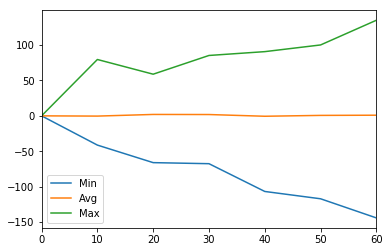

In [23]:
df4[['Min', 'Avg', 'Max']].plot()

Text(0, 0.5, 'Euro Stoxx 50 ETF %Chg')

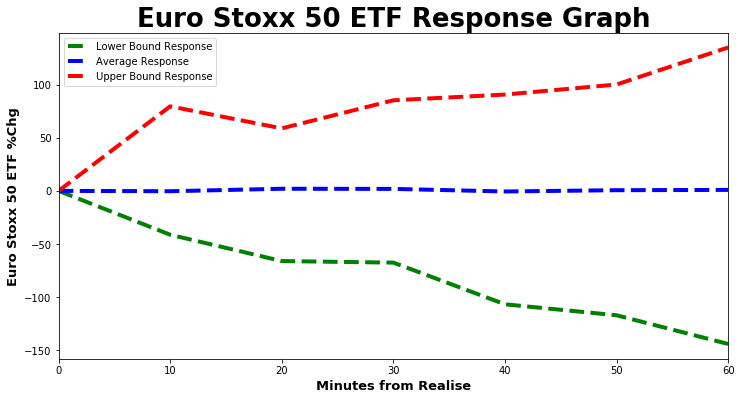

In [24]:
df4[['Min', 'Avg', 'Max']].plot(figsize=(12,6),LineWidth=4, color = ['g','b','r'], LineStyle = '--')
plt.title('Euro Stoxx 50 ETF Response Graph',fontsize=26, color='Black', weight="bold")
plt.legend(['Lower Bound Response','Average Response','Upper Bound Response'])
plt.xlabel('Minutes from Realise', fontsize=13, color='Black', weight="bold")
plt.ylabel('Euro Stoxx 50 ETF %Chg', fontsize=13, color='Black', weight="bold")



# Corr matrix with all data

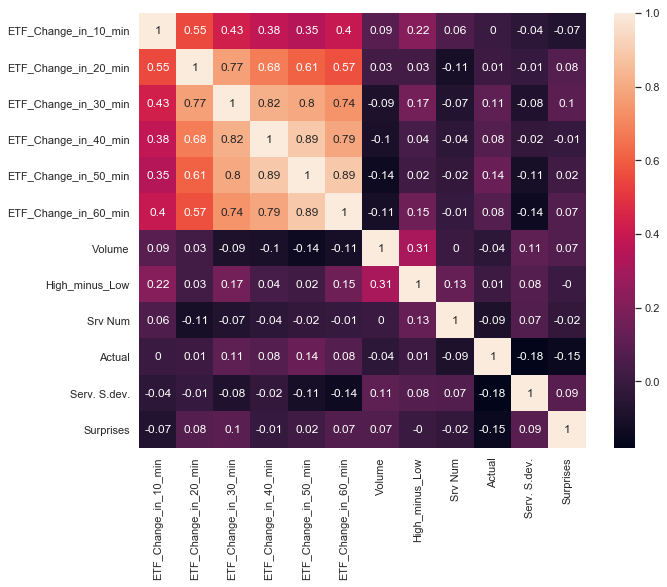

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [26]:
df0=df[['ETF_Change_in_10_min','ETF_Change_in_20_min','ETF_Change_in_30_min','ETF_Change_in_40_min',
         'ETF_Change_in_50_min','ETF_Change_in_60_min','Volume','High_minus_Low','Surprises']]

df0.head()

,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Surprises
0,-0.028086,-0.056172,-0.028086,0.098301,0.042129,0.042129,2000,0.010,-1.315789
1,0.000000,0.000000,0.014756,0.014756,0.088535,0.088535,3530,0.010,-1.298701
2,-0.044215,-0.103169,-0.338983,-0.368460,-0.324245,-0.397937,3683,0.015,0.000000
3,0.015002,-0.030003,-0.015002,-0.015002,0.045005,0.000000,4147,0.030,-1.265823
4,-0.048607,0.000000,-0.194426,-0.113415,-0.129618,-0.016202,12245,0.015,-2.469136


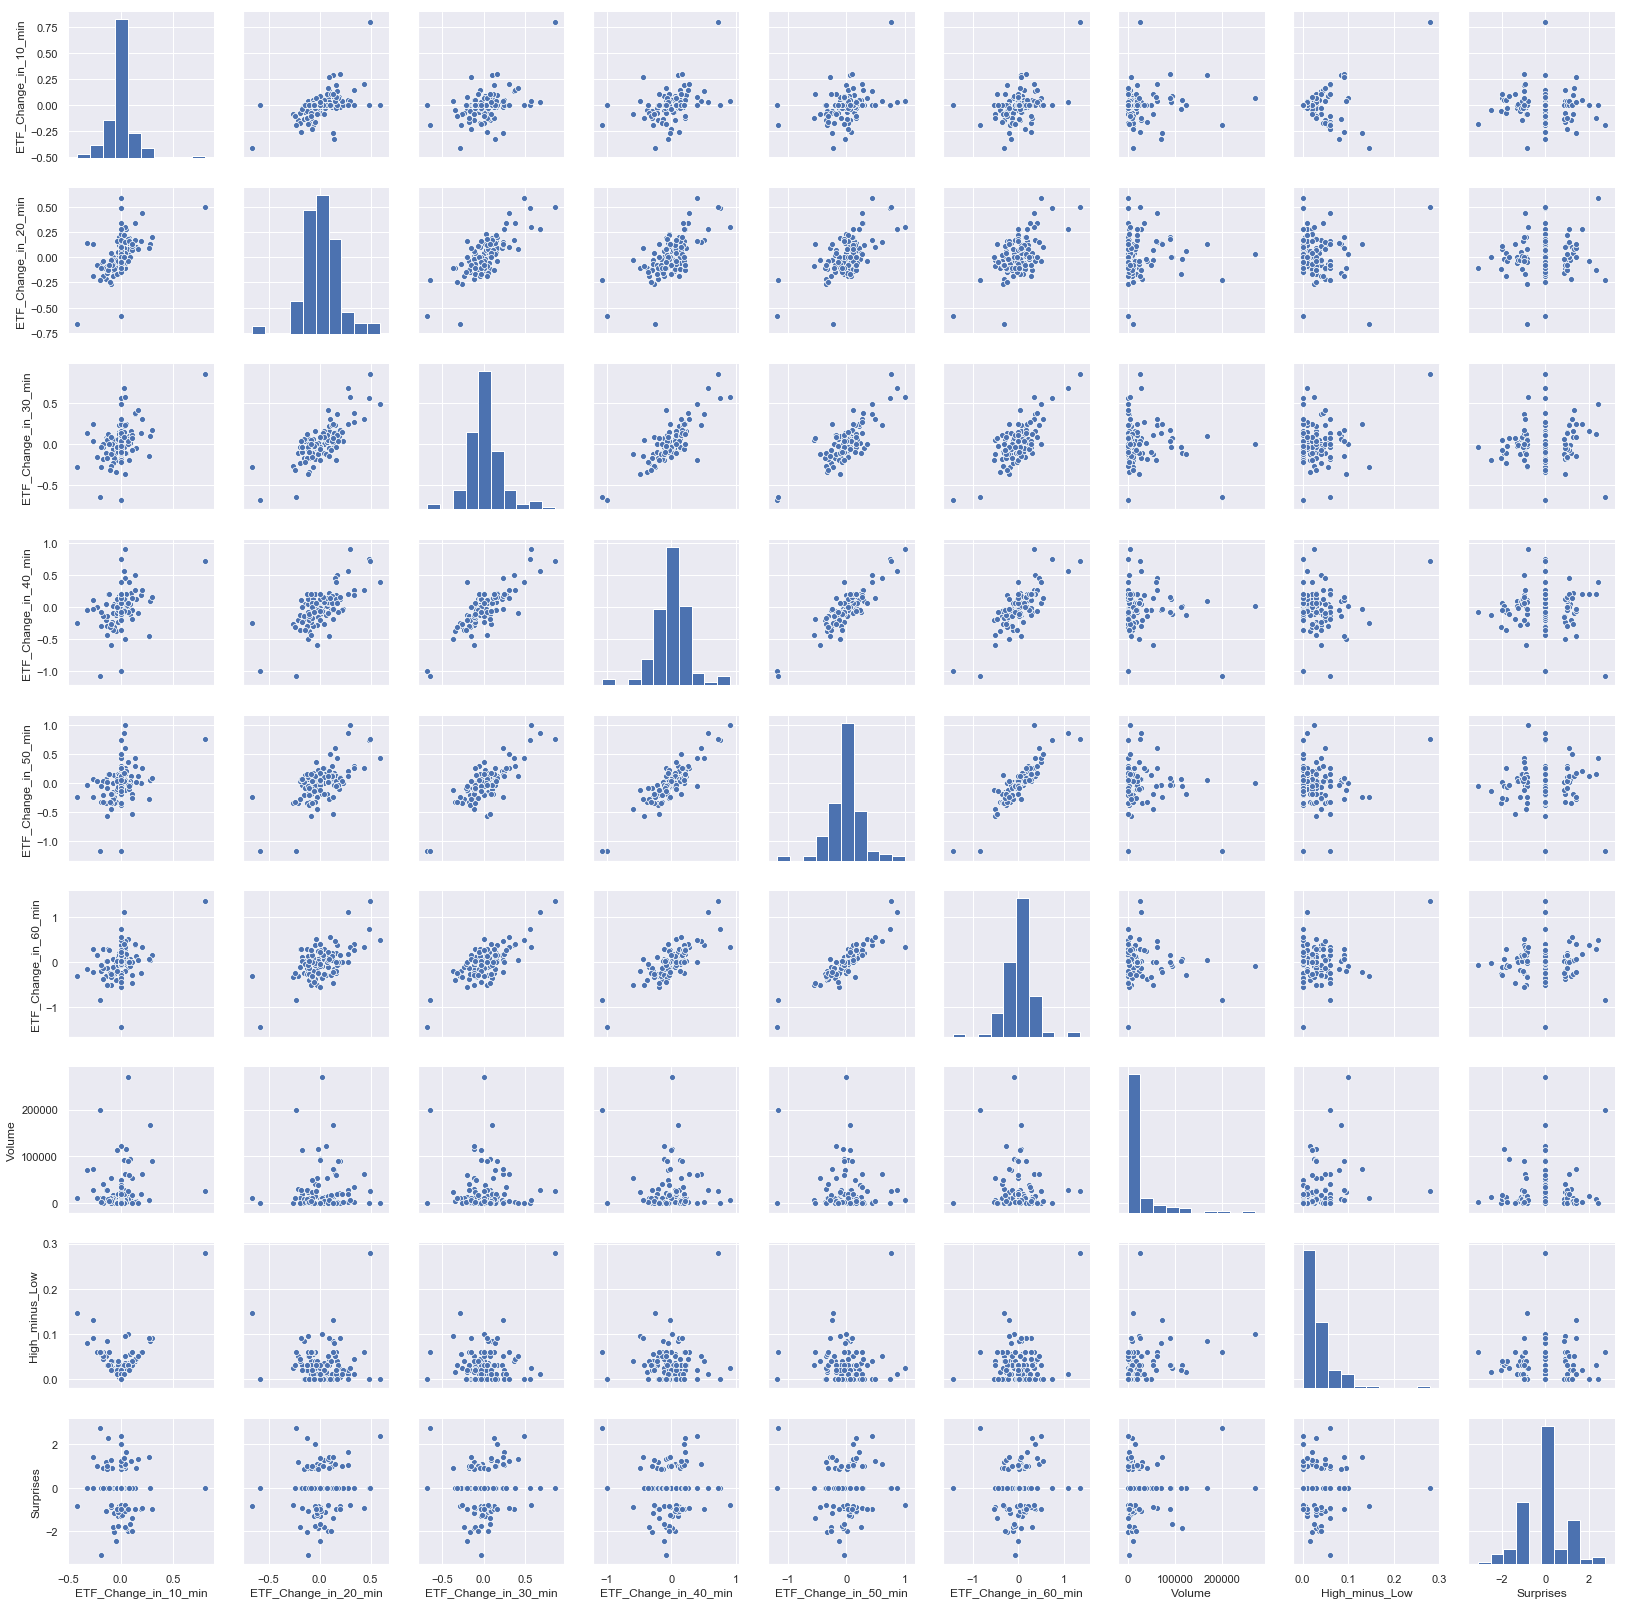

In [27]:
sns.pairplot(df0)

# Creating Correl Matrix where surprises values > 0

In [28]:
df1 = df[df['Surprises'] > 0]


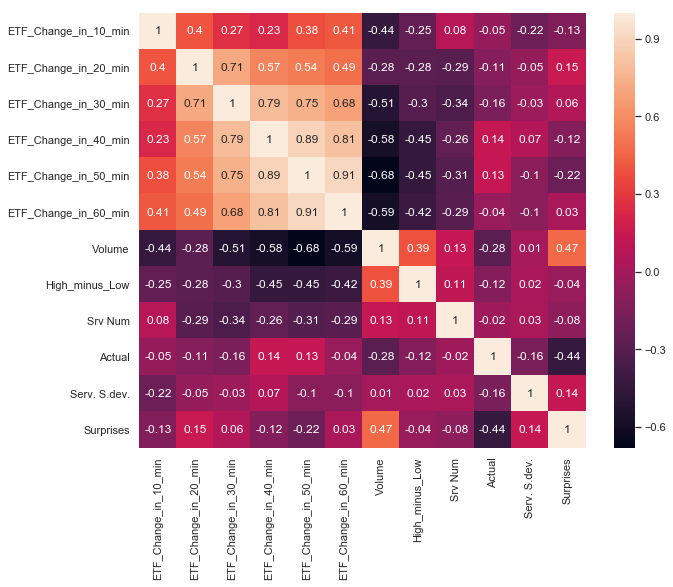

In [29]:
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix = df1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [30]:
df1=df1[['ETF_Change_in_10_min','ETF_Change_in_20_min','ETF_Change_in_30_min','ETF_Change_in_40_min',
         'ETF_Change_in_50_min','ETF_Change_in_60_min','Volume','High_minus_Low','Surprises']]

df1.head()

,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Surprises
5,0.094757,0.094757,0.157928,0.221099,0.126342,0.031586,10225,0.03,1.250000
11,-0.141965,-0.212947,-0.113572,-0.198751,-0.340716,-0.312323,30181,0.05,1.190476
18,0.000000,-0.027933,-0.013966,0.055866,0.055866,0.055866,4251,0.02,1.111111
23,0.000000,0.000000,-0.069920,0.000000,0.027968,0.041952,2639,0.00,1.063830
30,0.000000,0.118283,-0.050693,0.101386,0.304157,0.202771,1252,0.00,1.000000


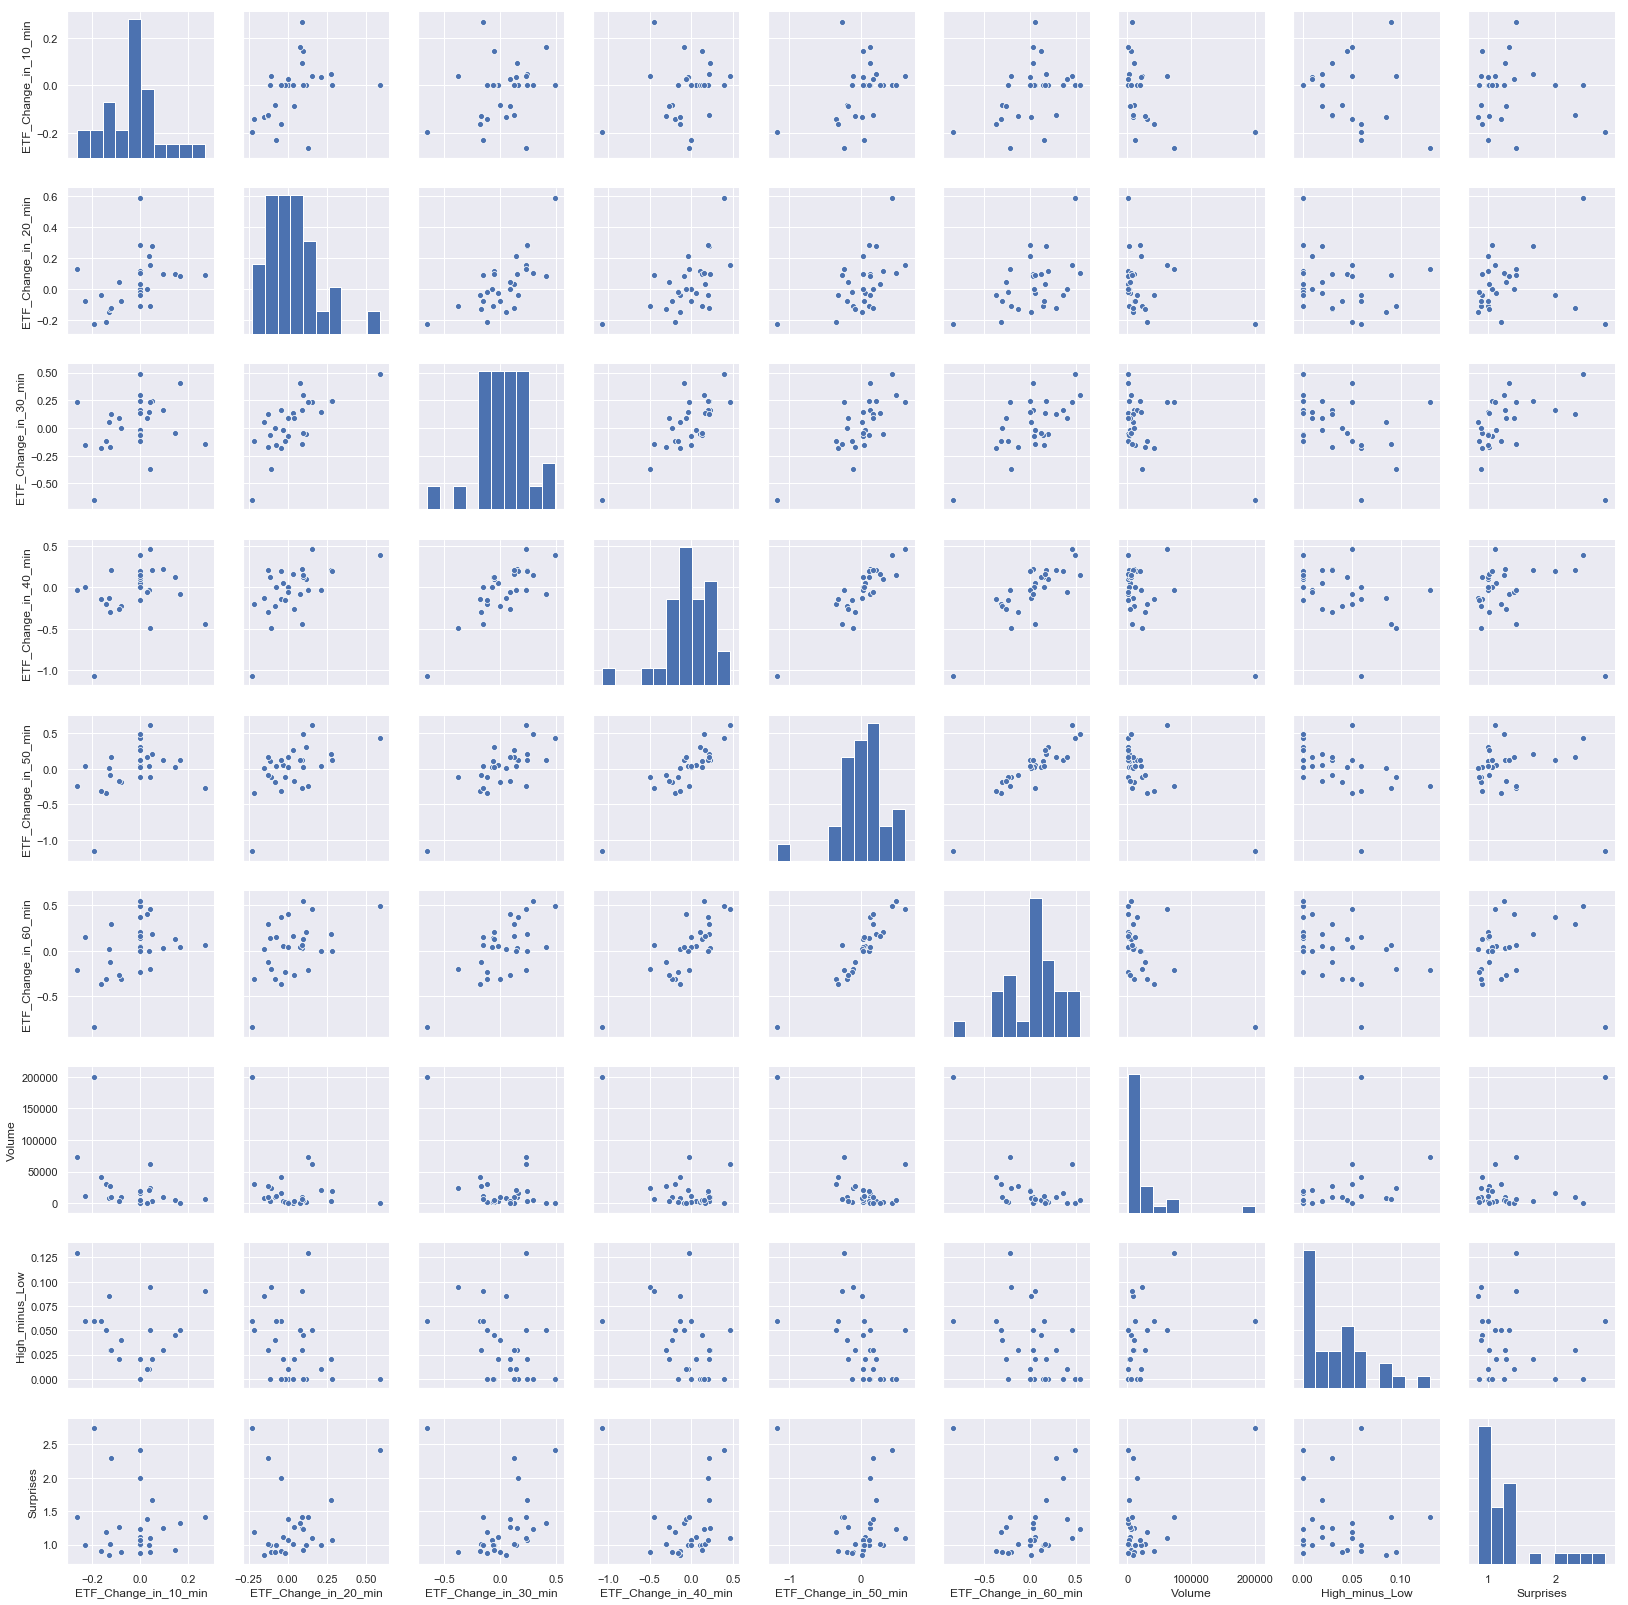

In [31]:
sns.pairplot(df1)

How drop row

In [32]:
# df1 = df1.drop(112)
# df1

# Creating Correl Matrix where surprises values < 0

In [33]:
df2 = df[df['Surprises'] < 0]

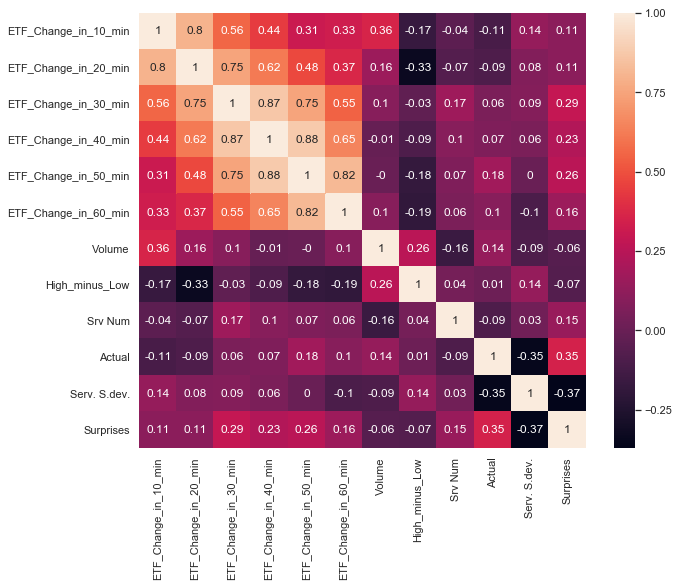

In [34]:
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix = df2.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [35]:
df2=df2[['ETF_Change_in_10_min','ETF_Change_in_20_min','ETF_Change_in_30_min','ETF_Change_in_40_min',
         'ETF_Change_in_50_min','ETF_Change_in_60_min','Volume','High_minus_Low','Surprises']]

df2.head()

,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Surprises
0,-0.028086,-0.056172,-0.028086,0.098301,0.042129,0.042129,2000,0.010,-1.315789
1,0.000000,0.000000,0.014756,0.014756,0.088535,0.088535,3530,0.010,-1.298701
3,0.015002,-0.030003,-0.015002,-0.015002,0.045005,0.000000,4147,0.030,-1.265823
4,-0.048607,0.000000,-0.194426,-0.113415,-0.129618,-0.016202,12245,0.015,-2.469136
10,-0.058522,-0.029261,-0.117045,-0.277981,-0.234089,-0.175567,11347,0.040,-1.176471


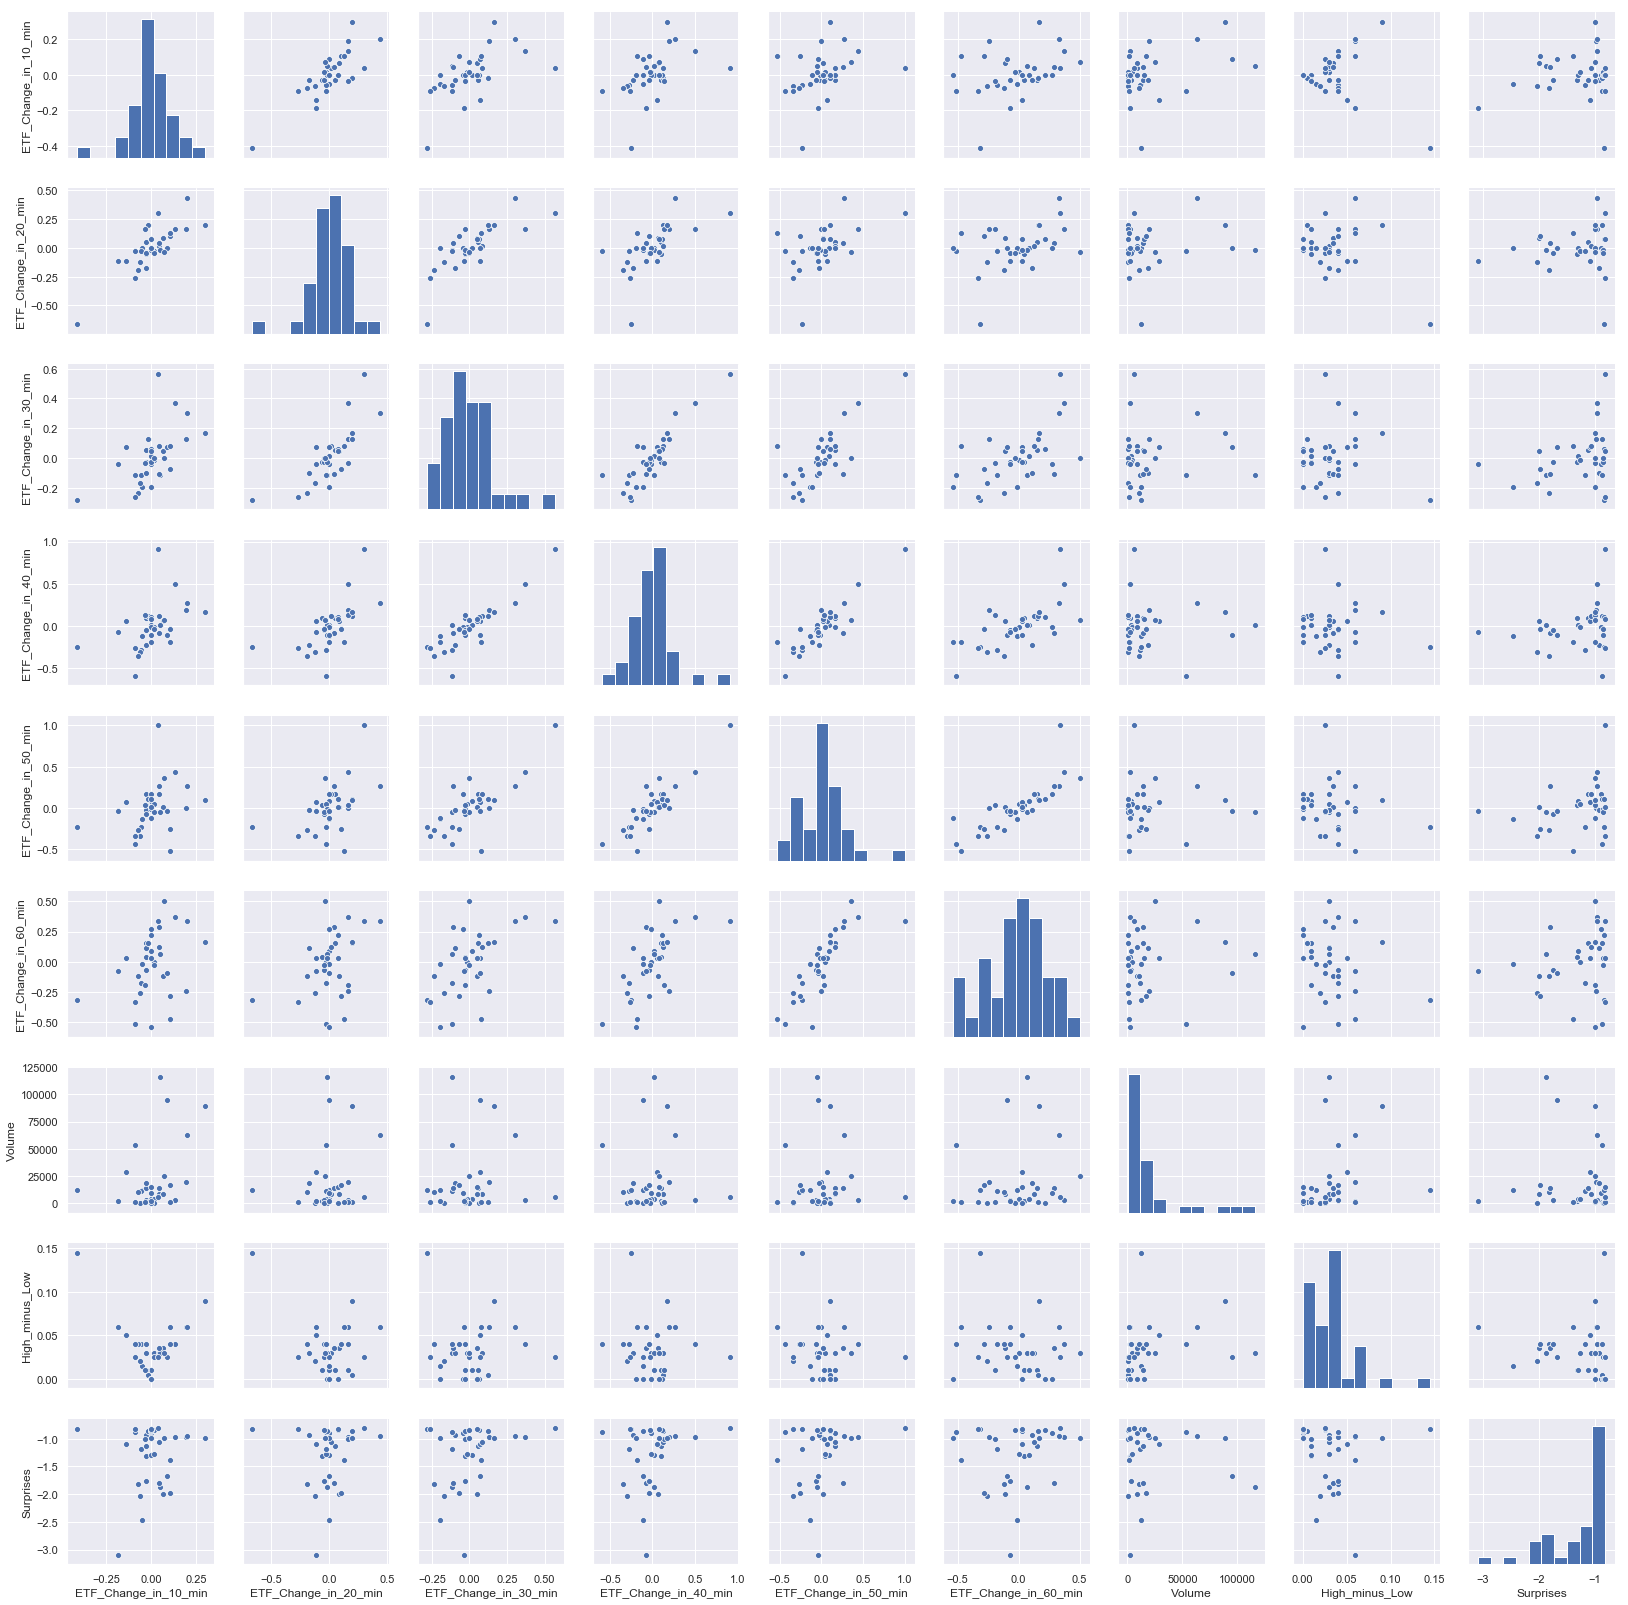

In [36]:
sns.pairplot(df2)

# Creating Correl Matrix where surprises values = 0

In [37]:
df3 = df[df['Surprises'] == 0]

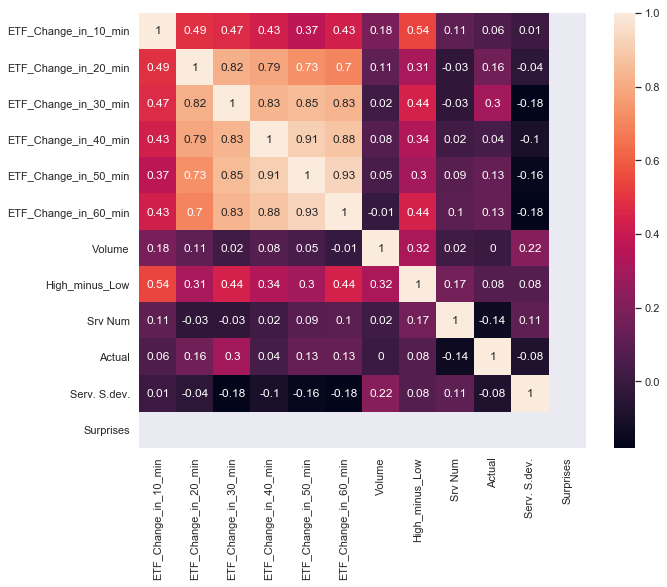

In [38]:
sns.set(rc={'figure.figsize':(10,8)})
correlation_matrix = df3.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [39]:
df3=df3[['ETF_Change_in_10_min','ETF_Change_in_20_min','ETF_Change_in_30_min','ETF_Change_in_40_min',
         'ETF_Change_in_50_min','ETF_Change_in_60_min','Volume','High_minus_Low','Surprises']]

df3.head()

,ETF_Change_in_10_min,ETF_Change_in_20_min,ETF_Change_in_30_min,ETF_Change_in_40_min,ETF_Change_in_50_min,ETF_Change_in_60_min,Volume,High_minus_Low,Surprises
2,-0.044215,-0.103169,-0.338983,-0.368460,-0.324245,-0.397937,3683,0.015,0.0
6,-0.062539,-0.140713,0.031270,0.046904,0.140713,0.078174,2076,0.020,0.0
7,0.029227,-0.087681,-0.043840,-0.029227,-0.014613,0.014613,11988,0.010,0.0
8,-0.072296,0.000000,0.057837,-0.086755,-0.144592,-0.289184,10060,0.025,0.0
9,0.000000,0.013996,-0.111966,-0.013996,0.013996,-0.055983,4910,0.000,0.0


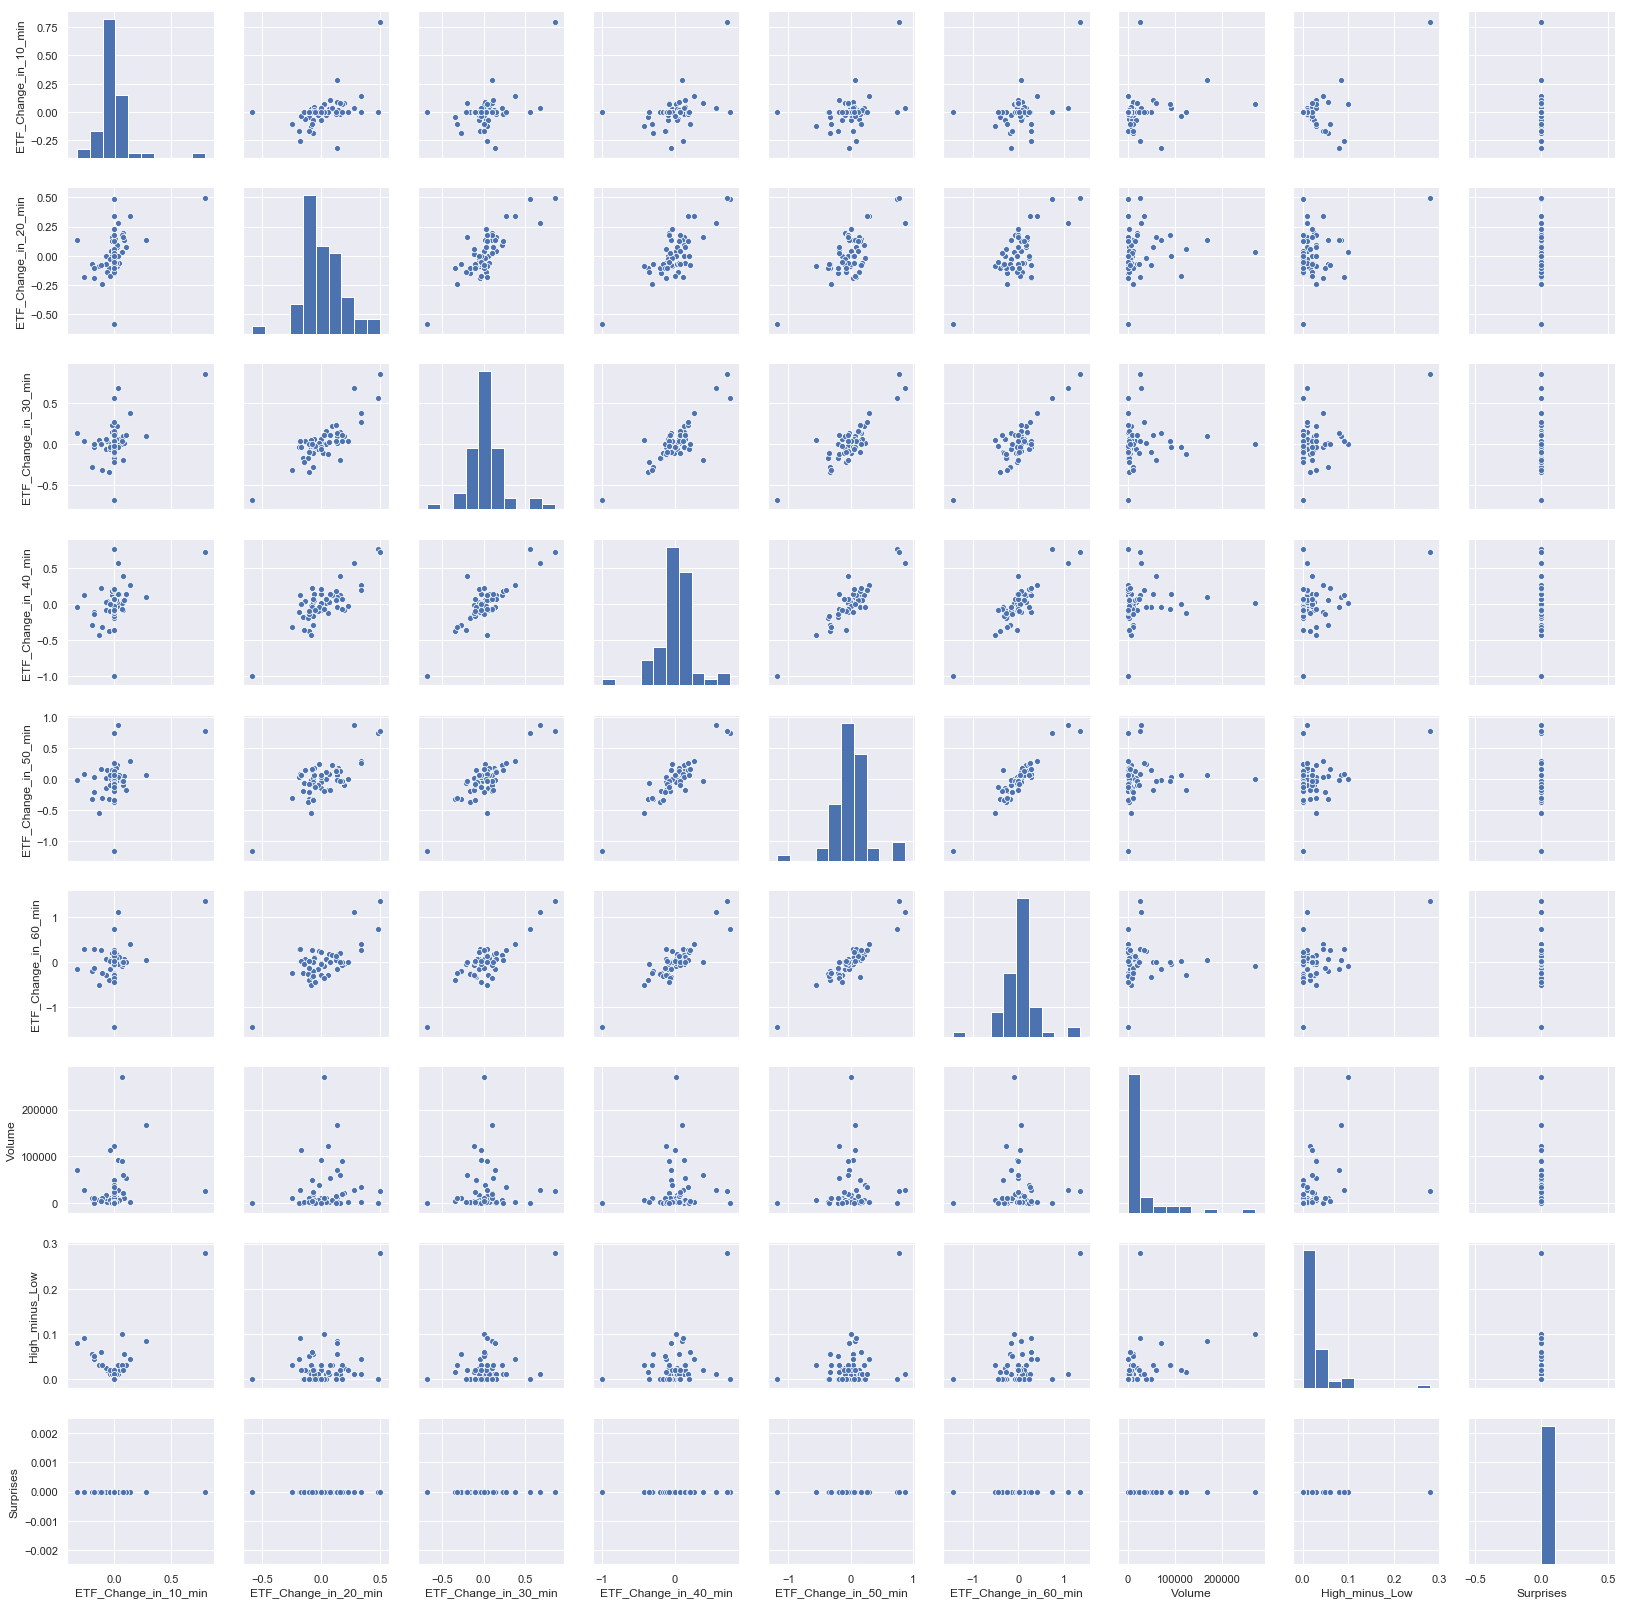

In [40]:
sns.pairplot(df3)